In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_dicts = []
for i in range(1, 1000+1):
    if i % 100 == 0:
        print(i, '...')
    myfile = open('./20200529_sipm_saturation_tests/file'+str(i)+'.txt', 'r')
    started = False
    file_dict = {}
    for line in myfile.readlines():
        if started:
            name = line[:line.find(':')]
            obj = eval(line[line.find(':')+1:])
            if i == 1:
                print(name)
                print(obj)
            file_dict[name] = obj
        else:
            started = True
    file_dicts.append(file_dict)
    myfile.close()

xyz_boxes
[([-350.0, -116.66666666666666], [-350.0, -116.66666666666666], [0.0, 400.0]), ([-350.0, -116.66666666666666], [-350.0, -116.66666666666666], [400.0, 800.0]), ([-350.0, -116.66666666666666], [-350.0, -116.66666666666666], [800.0, 1200.0]), ([-350.0, -116.66666666666666], [-116.66666666666666, 116.66666666666669], [0.0, 400.0]), ([-350.0, -116.66666666666666], [-116.66666666666666, 116.66666666666669], [400.0, 800.0]), ([-350.0, -116.66666666666666], [-116.66666666666666, 116.66666666666669], [800.0, 1200.0]), ([-350.0, -116.66666666666666], [116.66666666666669, 350.0], [0.0, 400.0]), ([-350.0, -116.66666666666666], [116.66666666666669, 350.0], [400.0, 800.0]), ([-350.0, -116.66666666666666], [116.66666666666669, 350.0], [800.0, 1200.0]), ([-116.66666666666666, 116.66666666666669], [-350.0, -116.66666666666666], [0.0, 400.0]), ([-116.66666666666666, 116.66666666666669], [-350.0, -116.66666666666666], [400.0, 800.0]), ([-116.66666666666666, 116.66666666666669], [-350.0, -116.66

100 ...
200 ...
300 ...
400 ...
500 ...
600 ...
700 ...
800 ...
900 ...
1000 ...


In [3]:
len(file_dicts)

1000

In [19]:
file_dicts[0].keys()

dict_keys(['xyz_boxes', 'S1_matrix_PMT', 'S2_matrix_PMT', 'S1s_SiPMs', 'S2s_SiPMs', 'Mean_max_sipm_box', 'Mean_maxperus_sipm_box', 'Std_maxperus_sipm_box', 'Num_events_per_box'])

In [4]:
xyz_boxes = file_dicts[0]['xyz_boxes']

In [5]:
rings = list(file_dicts[0]['S1_matrix_PMT'].keys())
rings.sort()
print(rings)

[125.0, 217.0, 250.0, 331.0, 375.0, 433.0, 451.0, 500.0]


In [6]:
box_totals = [sum([file_dict['Num_events_per_box'][box_i] for file_dict in file_dicts]) for box_i in range(len(xyz_boxes))]
print(box_totals)
print('Length =', len(box_totals))

[23816, 23876, 23893, 23862, 23635, 23947, 23896, 23705, 23995, 23758, 23775, 23832, 23517, 23603, 23586, 24029, 23677, 23634, 23776, 23656, 23864, 23862, 23810, 23309, 23811, 23865, 23717]
Length = 27


In [7]:
# Pseudoaverage - weighted by file, instead of numbe of events
S1_matrix_PMT_pavg = {ring:sum([np.array(file_dict['S1_matrix_PMT'][ring]) for file_dict in file_dicts])/len(file_dicts) for ring in rings}
print(S1_matrix_PMT_pavg)

{125.0: array([0.31143429, 0.36577786, 0.44730334, 0.31159901, 0.36689579,
       0.46502473, 0.31314703, 0.36460798, 0.44594309, 0.31001373,
       0.36772871, 0.46420969, 0.32112231, 0.37388205, 0.49372836,
       0.31321256, 0.37071368, 0.46305418, 0.30567778, 0.36372951,
       0.45157852, 0.31647396, 0.36863241, 0.46088252, 0.30612215,
       0.36716322, 0.44915923]), 217.0: array([0.30216917, 0.35612075, 0.44446637, 0.30173984, 0.35747078,
       0.45061564, 0.30746718, 0.35549143, 0.44213212, 0.29987349,
       0.3566086 , 0.44936844, 0.30706162, 0.35801326, 0.4557204 ,
       0.30655891, 0.3563996 , 0.44667774, 0.29957507, 0.35219806,
       0.43756406, 0.30483514, 0.3597442 , 0.44576842, 0.29855403,
       0.35634894, 0.4406661 ]), 250.0: array([0.29864975, 0.34687341, 0.43422378, 0.29872873, 0.3524705 ,
       0.43869881, 0.30871181, 0.34832103, 0.43690086, 0.30020126,
       0.35330839, 0.43953396, 0.30091234, 0.35325792, 0.44164863,
       0.30130857, 0.35051512, 0.44057269

In [8]:
# Pseudoaverage - weighted by file, instead of numbe of events
S2_matrix_PMT_pavg = {ring:sum([np.array(file_dict['S2_matrix_PMT'][ring]) for file_dict in file_dicts])/len(file_dicts) for ring in rings}
print(S2_matrix_PMT_pavg)

{125.0: array([145.93732967, 140.98144964, 136.38047866, 157.14308725,
       152.0566708 , 147.01447144, 145.84109535, 141.09153623,
       136.21800594, 157.33839182, 152.1369455 , 147.11881021,
       169.11452277, 163.60531074, 158.27873404, 157.14970062,
       152.12761727, 147.13566878, 145.79069139, 141.10760933,
       136.28779646, 157.1685933 , 152.17599724, 147.02038672,
       145.81592374, 140.9510052 , 136.24696999]), 217.0: array([144.08329024, 139.19134964, 134.59293236, 153.59302046,
       148.5765358 , 143.68795637, 143.95796908, 139.34494515,
       134.50773747, 153.61924131, 148.59393475, 143.71523664,
       160.17537843, 154.99715465, 149.88589634, 153.64605185,
       148.61781581, 143.75129897, 143.9193828 , 139.28680865,
       134.5147847 , 153.58482604, 148.65336554, 143.67706162,
       143.96936532, 139.0971059 , 134.488247  ]), 250.0: array([143.07420449, 138.17150099, 133.67016689, 151.58157782,
       146.75298672, 141.85071909, 142.99443213, 138.3964

In [20]:
Mean_maxperus_sipm_box = [ sum([file_dict['Mean_maxperus_sipm_box'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(Mean_maxperus_sipm_box)

[32.36152166610682, 19.61991120790752, 14.552044531871259, 32.424775794149696, 19.64218320287709, 14.530797177099428, 32.32754435888852, 19.60383885256275, 14.579912481767035, 32.34960855290849, 19.545951629863303, 14.537722390063779, 32.30395033380108, 19.60746515273482, 14.51920630882727, 32.248699488118525, 19.62060227224733, 14.53901159346704, 32.360657806191114, 19.663383496787283, 14.600234663090848, 32.33203419663062, 19.612683746325075, 14.559826676391094, 32.397463357271846, 19.652838885397024, 14.610279546316988]


In [21]:
Std_maxperus_sipm_box = [ sum([file_dict['Std_maxperus_sipm_box'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(Std_maxperus_sipm_box)

[8.11304318870324, 3.8267243838041956, 2.7907375537516437, 8.228274513103, 3.8820159052846024, 2.7860428270331403, 8.105020499197188, 3.8485744415701832, 2.796229195015165, 8.11334969032554, 3.8255325755446874, 2.8116728092409824, 8.047783291556438, 3.8358061557940504, 2.762222061617011, 8.072046688537878, 3.8363605168273254, 2.8382538519472487, 8.128541272083805, 3.870638003525312, 2.817742508048597, 8.064877044305963, 3.833286125829021, 2.799633957990772, 8.136765100380021, 3.8862587628024006, 2.8216374141188454]


In [9]:
S1s_SiPMs_avg = [ sum([file_dict['S1s_SiPMs'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(S1s_SiPMs_avg)

[3.1260077258985555, 1.8170128999832467, 1.2602435859875278, 3.0525102673707147, 1.8143854453141528, 1.2590303587088154, 3.2088215600937398, 1.8164522252689306, 1.2653052719316524, 3.039944439767657, 1.8018086225026289, 1.2750923128566634, 3.0153505974401495, 1.8223530907088081, 1.262274230475706, 3.0617170918473513, 1.8255691177091693, 1.2565371921807564, 3.0663273889636606, 1.826175177544809, 1.2532685216225277, 3.051043500125723, 1.8162116757664846, 1.2544939722853834, 3.0916803158204194, 1.8123192960402263, 1.253025256145381]


In [10]:
S2s_SiPMs_avg = [ sum([file_dict['S2s_SiPMs'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(S2s_SiPMs_avg)

[2327.5361941551896, 2250.3929468922765, 2176.424392081363, 2346.8098650574134, 2270.736492489951, 2196.180774209713, 2327.1001841312354, 2251.615397595444, 2176.1818712231716, 2346.4231837696775, 2269.8145110410096, 2196.4485146022157, 2336.8307182038525, 2260.57619794094, 2187.18426185025, 2346.021890215989, 2270.463361067703, 2194.9909875602943, 2328.3389552489907, 2252.3106611430503, 2176.1965303385855, 2346.540734221775, 2269.590466190676, 2196.1074263160153, 2326.6713283776407, 2251.1099518122774, 2176.446472994055]


In [11]:
Mean_max_sipm_box_avg = [ sum([file_dict['Mean_max_sipm_box'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(Mean_max_sipm_box_avg)

[130.09107322808197, 103.56630088792093, 86.9479345414975, 130.20471879976532, 103.37000211550667, 86.7235144276945, 130.0543187144292, 103.53330520987133, 86.88847676599292, 129.9619496590622, 103.23116719242903, 86.6958291372944, 129.813879321342, 103.23272465364572, 86.76155346391927, 129.71517749386157, 103.56451408539934, 86.6968350681222, 130.18009757738898, 103.69153703077443, 87.01319979886021, 130.01822982147348, 103.28416631667366, 86.77420738770432, 130.23039771534164, 103.59455269222711, 87.01062528987646]


In [12]:
xy_bins = set({})
z_bins = set({})
for box in xyz_boxes:
    xb = tuple(box[0])
    yb = tuple(box[1])
    zb = tuple(box[2])
    xy_bins.add((xb, yb))
    z_bins.add(zb)

In [13]:
import itertools as it
def get_index_from_box(mybox, myboxes):
    for myi_box, mytest_box in zip(range(len(myboxes)), myboxes):
        box_equal = True
        for i, j in it.product(range(3), range(2)):
            if not mytest_box[i][j] == mybox[i][j]:
                box_equal = False
        if box_equal:
            return myi_box
    return -1

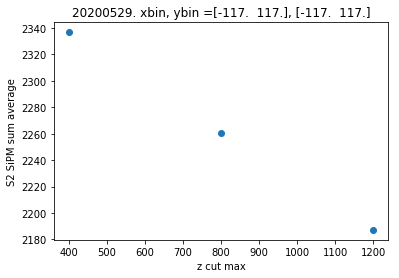

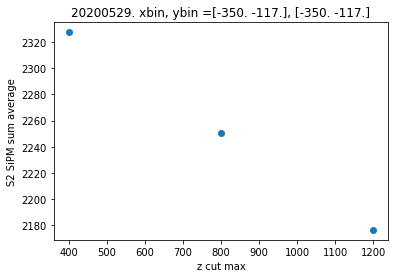

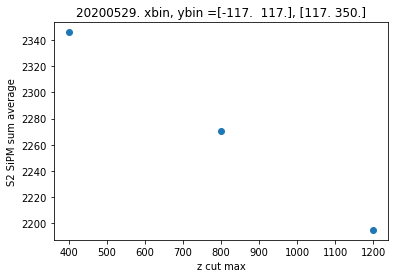

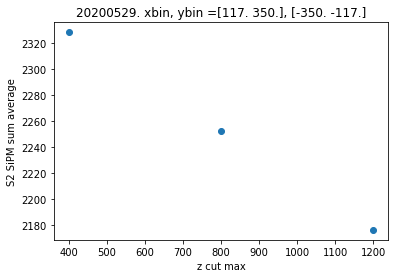

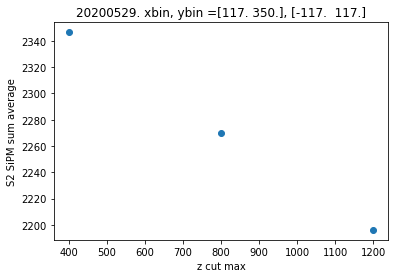

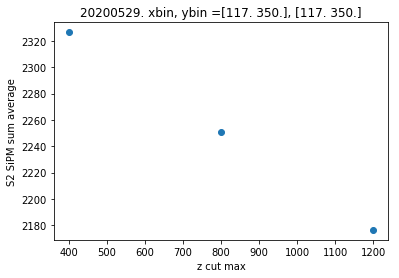

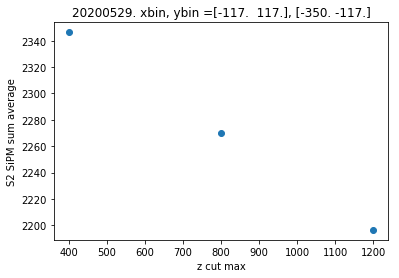

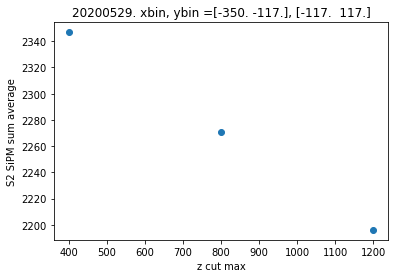

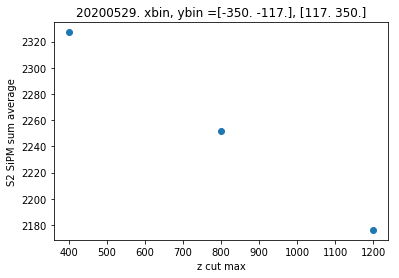

In [14]:
run_no = '20200529'

for xyb in xy_bins:
    S2s_SiPMs_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        S2s_SiPMs_avg_vZ.append(S2s_SiPMs_avg[box_i])
    plt.plot(zs, S2s_SiPMs_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S2 SiPM sum average')
    plt.show()

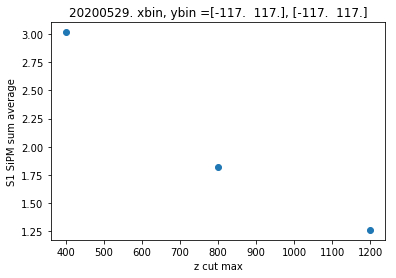

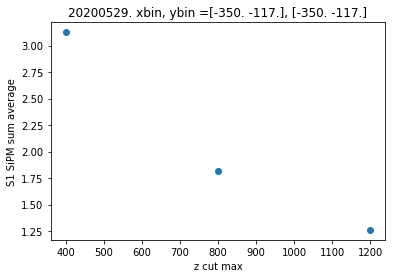

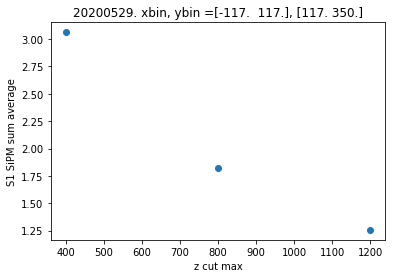

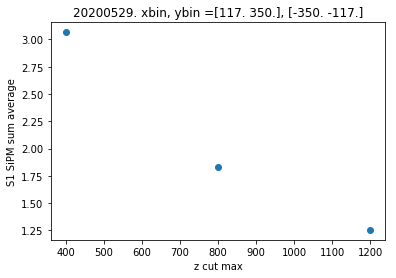

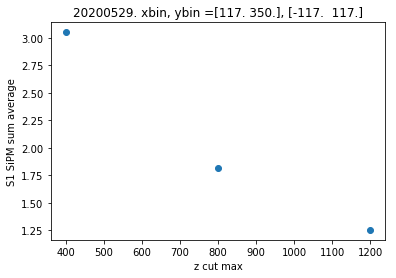

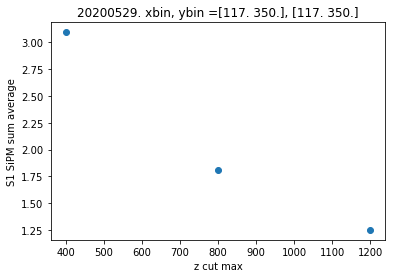

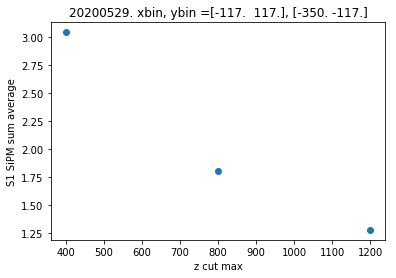

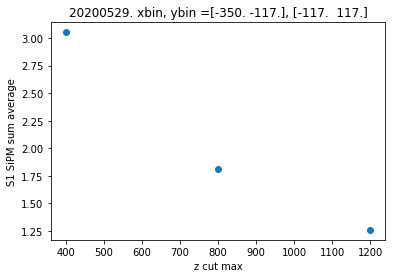

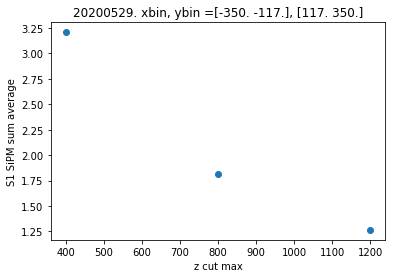

In [15]:
for xyb in xy_bins:
    S1s_SiPMs_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        S1s_SiPMs_avg_vZ.append(S1s_SiPMs_avg[box_i])
    plt.plot(zs, S1s_SiPMs_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S1 SiPM sum average')
    plt.show()

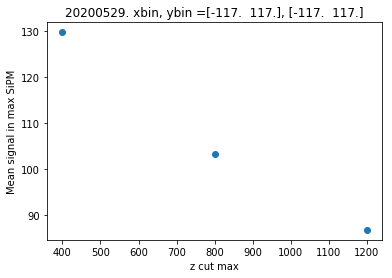

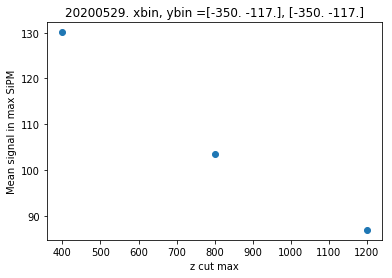

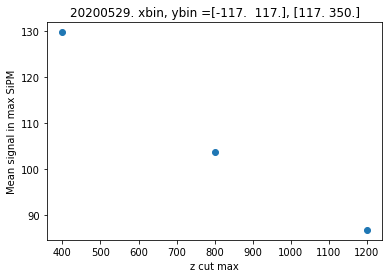

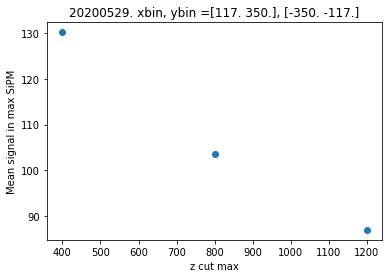

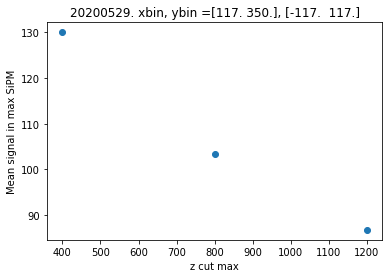

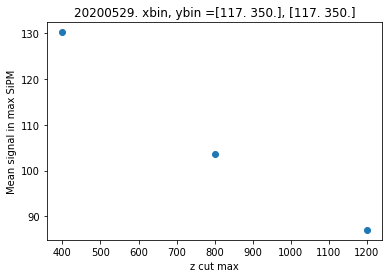

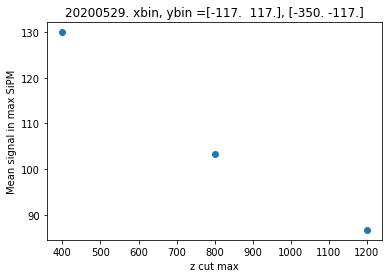

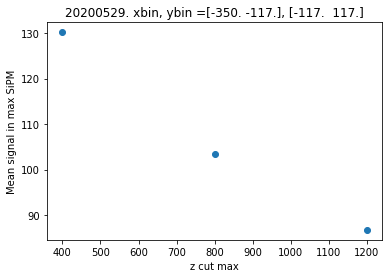

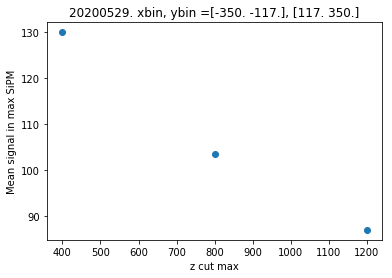

In [16]:
for xyb in xy_bins:
    Mean_max_sipm_box_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        Mean_max_sipm_box_avg_vZ.append(Mean_max_sipm_box_avg[box_i])
    plt.plot(zs, Mean_max_sipm_box_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('Mean signal in max SiPM')
    plt.show()

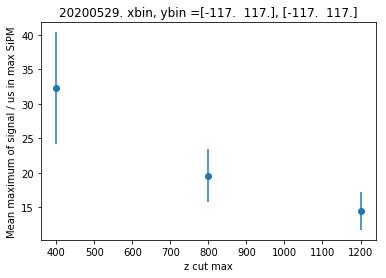

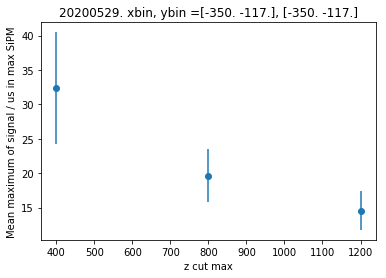

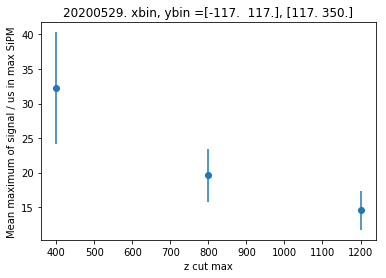

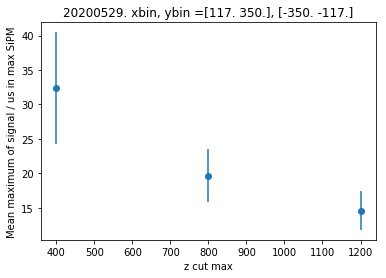

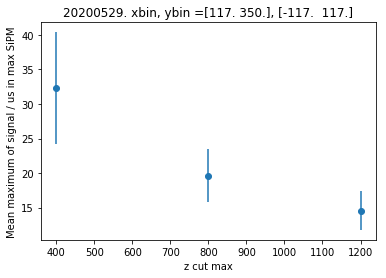

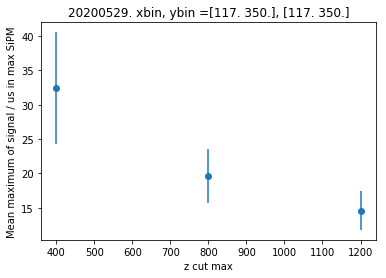

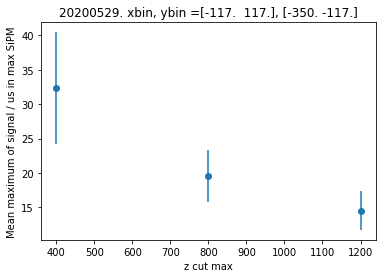

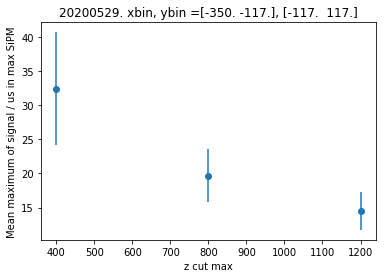

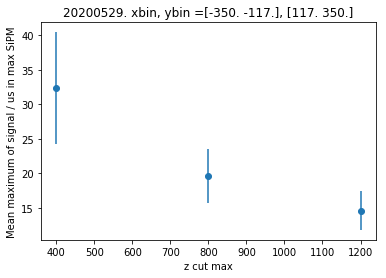

In [23]:
for xyb in xy_bins:
    Mean_maxperus_sipm_box_avg_vZ = []
    Std_maxperus_sipm_box_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        Mean_maxperus_sipm_box_avg_vZ.append(Mean_maxperus_sipm_box[box_i])
        Std_maxperus_sipm_box_avg_vZ.append(Std_maxperus_sipm_box[box_i])
    plt.errorbar(zs, Mean_maxperus_sipm_box_avg_vZ, yerr = Std_maxperus_sipm_box_avg_vZ,fmt='o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('Mean maximum of signal / us in max SiPM')
    plt.show()

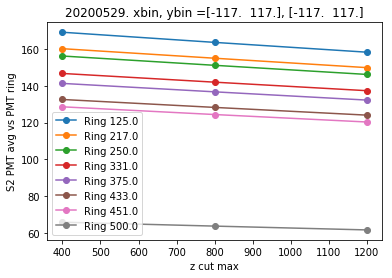

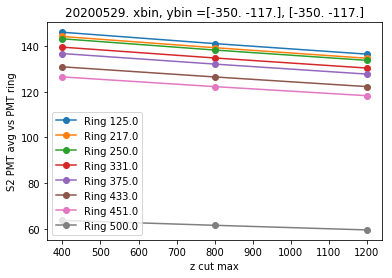

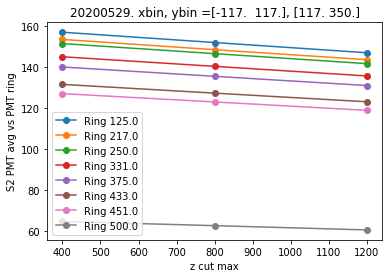

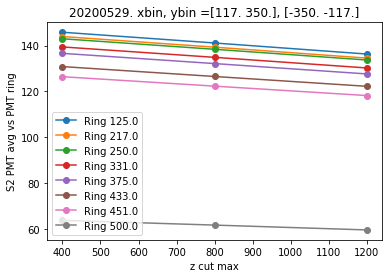

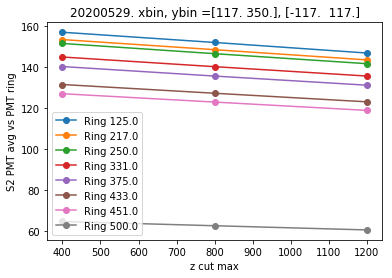

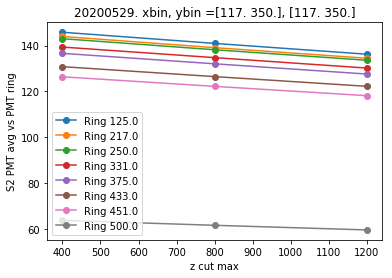

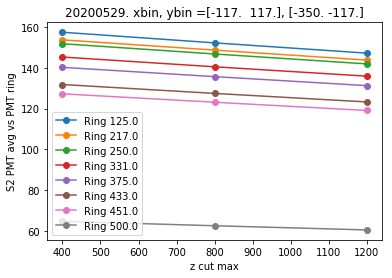

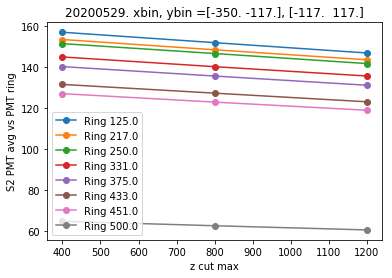

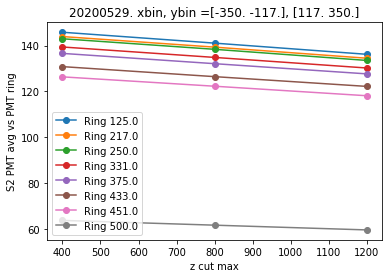

In [17]:
for xyb in xy_bins:
    for ring in rings:
        S2_matrix_PMT_pavg_ring_vZ = []
        zs = []
        for zb in z_bins:
            full_box = xyb + (zb,)
            zs.append(zb[1])
            box_i = get_index_from_box(full_box, xyz_boxes)
            S2_matrix_PMT_pavg_ring_vZ.append(S2_matrix_PMT_pavg[ring][box_i])
        zs, S2_matrix_PMT_pavg_ring_vZ = zip(*sorted(zip(zs, S2_matrix_PMT_pavg_ring_vZ)))
        plt.plot(zs, S2_matrix_PMT_pavg_ring_vZ, 'o-', label = 'Ring '+str(ring))
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S2 PMT avg vs PMT ring')
    plt.legend()
    plt.show()

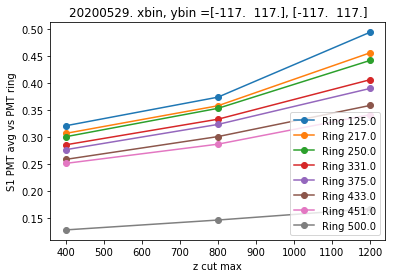

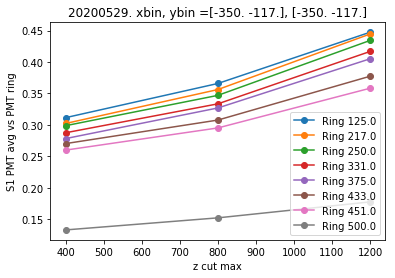

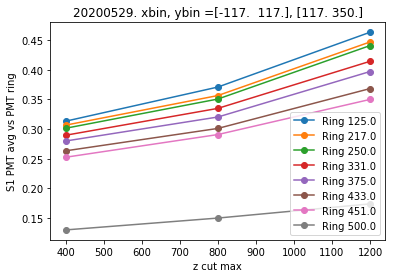

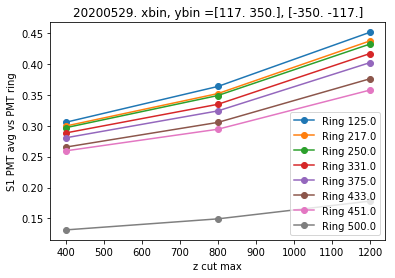

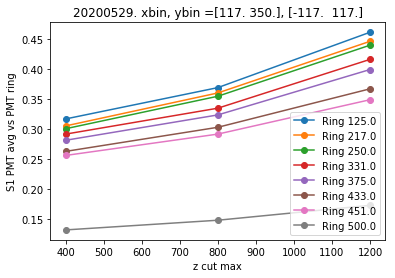

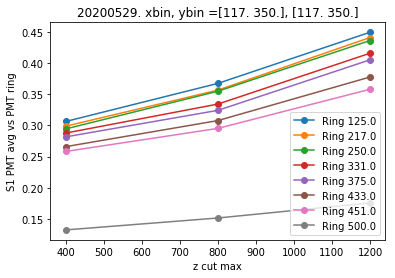

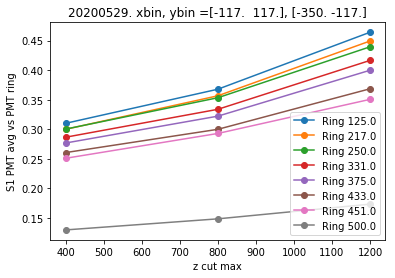

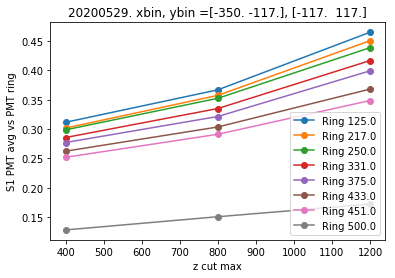

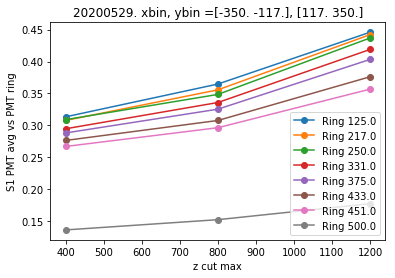

In [18]:
for xyb in xy_bins:
    for ring in rings:
        S1_matrix_PMT_pavg_ring_vZ = []
        zs = []
        for zb in z_bins:
            full_box = xyb + (zb,)
            zs.append(zb[1])
            box_i = get_index_from_box(full_box, xyz_boxes)
            S1_matrix_PMT_pavg_ring_vZ.append(S1_matrix_PMT_pavg[ring][box_i])
        zs, S1_matrix_PMT_pavg_ring_vZ = zip(*sorted(zip(zs, S1_matrix_PMT_pavg_ring_vZ)))
        plt.plot(zs, S1_matrix_PMT_pavg_ring_vZ, 'o-', label = 'Ring '+str(ring))
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S1 PMT avg vs PMT ring')
    plt.legend()
    plt.show()
